In [1]:
import pandas as pd
import numpy as np
import plotly
import talib
import os
df = pd.read_csv('FEMELI.txt')
print df
# open = np.array([float(x) for x in df['<OPEN>'].values.tolist()])
# high = np.array([float(x) for x in df['<HIGH>'].values.tolist()])
# low  = np.array([float(x) for x in df['<LOW>'].values.tolist()])
# close= np.array([float(x) for x in df['<CLOSE>'].values.tolist()])
# print talib.CDLENGULFING(open,high,low,close).tolist()


     <Ticker> <Per>  <DTYYYYMMDD>  <TIME>  <OPEN>  <HIGH>  <LOW>  <CLOSE>  \
0      FEMELI     d      20070204       0      90      90     81       83   
1      FEMELI     d      20070205       0      85      85     85       85   
2      FEMELI     d      20070206       0      86      86     86       86   
3      FEMELI     d      20070207       0      88      88     88       88   
4      FEMELI     d      20070210       0      90      90     90       90   
5      FEMELI     d      20070212       0      92      92     90       90   
6      FEMELI     d      20070213       0      92      92     92       92   
7      FEMELI     d      20070214       0      94      94     94       94   
8      FEMELI     d      20070217       0      96      96     93       95   
9      FEMELI     d      20070218       0      95      96     93       95   
10     FEMELI     d      20070219       0      93      95     93       95   
11     FEMELI     d      20070220       0      93      94     93       94   

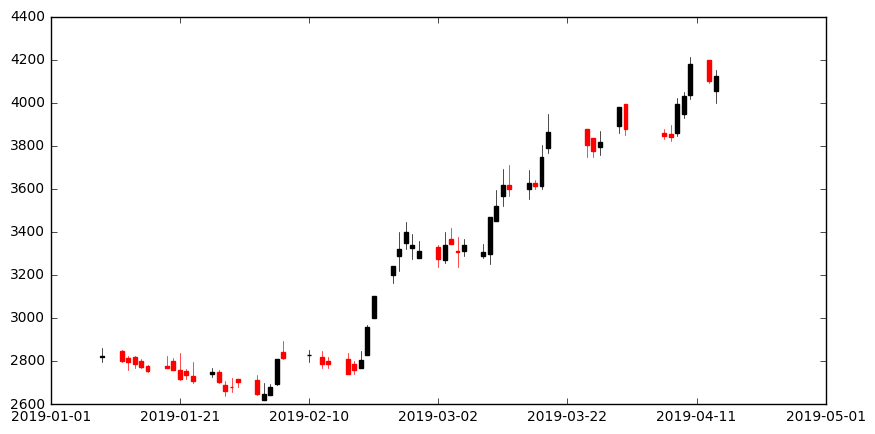

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
def plot(df):
    df['Date'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
    df["Date"] = df["Date"].apply(mdates.date2num)
    ohlc= df[['Date', '<OPEN>', '<HIGH>', '<LOW>','<CLOSE>']].copy()
    # In case you want to check for shorter timespan
    ohlc =ohlc.tail(60)
    f1, ax = plt.subplots(figsize = (10,5))
    # plot the candlesticks
    candlestick_ohlc(ax, ohlc.values, width=.6, colorup='k', colordown='r',alpha=1)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # Saving image
    plt.savefig('OHLC HDFC.png')
    # In case you dont want to save image but just displya it
    plt.show()

df = pd.read_csv('FEMELI.txt')
plot(df)

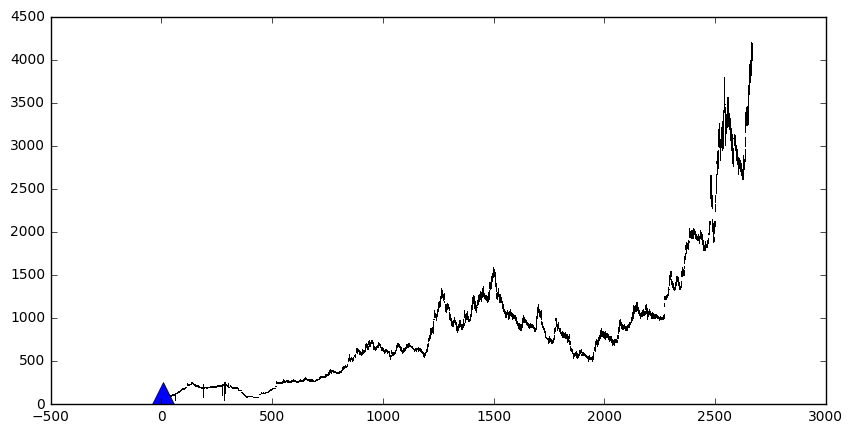

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from matplotlib.finance import candlestick2_ohlc
import matplotlib.dates as mdates
def plot(df,marker=''):
    df['Date'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
    df["Date"] = df["Date"].apply(mdates.date2num)
    ohlc= df[['Date', '<OPEN>', '<HIGH>', '<LOW>','<CLOSE>']].copy()
    # In case you want to check for shorter timespan
#     ohlc =ohlc.tail(60)
#     print ohlc.values[:,1]
    f1, ax = plt.subplots(figsize = (10,5))
    # plot the candlesticks
    candlestick2_ohlc(ax, ohlc.values[:,1],ohlc.values[:,2],ohlc.values[:,3],ohlc.values[:,4],width=0.7,colorup='w',colordown='k',alpha=1)
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-'))
    # Saving image
    if marker != '':
        if marker == 'bull':
            plt.plot(5,ohlc.values[:,2][5]+10, marker="^",markersize=20)
        else:
            plt.plot(5,ohlc.values[:,2][5]+10, marker="v",markersize=20)
    plt.savefig('OHLC HDFC.png')
    
    # In case you dont want to save image but just displya it
#     plt.show()

df = pd.read_csv('FEMELI.txt')
plot(df,'bull')
# df

[ 257  467  547  590  642  655  669  744  810  831  863  908  918 1020 1052
 1059 1079 1225 1334 1354 1416 1429 1443 1479 1529 1547 1567 1756 1768 1896
 1898 1927 1977 2001 2043 2050 2091 2128 2134 2174 2198 2284 2485 2642]
<Ticker>          FEMELI
<Per>                  d
<DTYYYYMMDD>    20161119
<TIME>                 0
<OPEN>              1066
<HIGH>              1143
<LOW>               1061
<CLOSE>             1089
<VOL>           21287250
Date              736287
Name: 2134, dtype: object


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1066.0
['FEMELI' 'd' 20161119 0 1066 1143 1061 1089 21287250 736287.0]


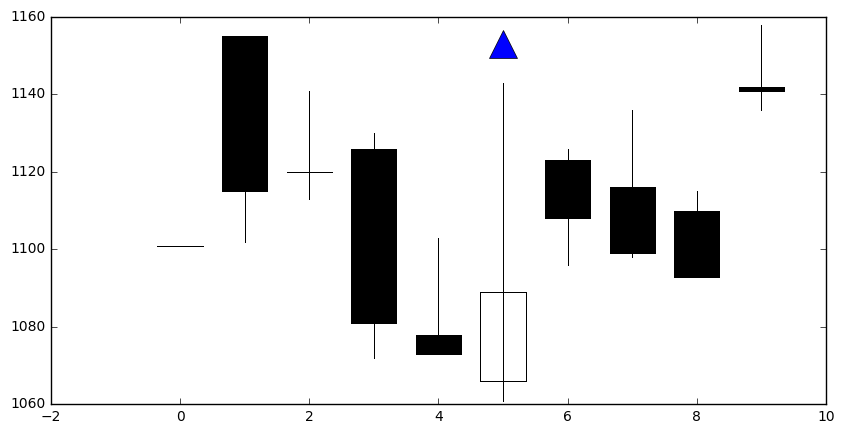

In [7]:
open = np.array([float(x) for x in df['<OPEN>'].values.tolist()])
high = np.array([float(x) for x in df['<HIGH>'].values.tolist()])
low  = np.array([float(x) for x in df['<LOW>'].values.tolist()])
close= np.array([float(x) for x in df['<CLOSE>'].values.tolist()])
res = talib.CDLENGULFING(open,high,low,close).tolist()
res = np.array(res)
print np.where(res==100)[0]
pivot = 2134
print df.ix[pivot]
plot(df[pivot-5:pivot+5],'bull')
print open[pivot]
print df.ix[pivot].values
pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4


In [9]:
print "ENGULFING"
open = np.array([float(x) for x in df['<OPEN>'].values.tolist()])
high = np.array([float(x) for x in df['<HIGH>'].values.tolist()])
low  = np.array([float(x) for x in df['<LOW>'].values.tolist()])
close= np.array([float(x) for x in df['<CLOSE>'].values.tolist()])
res = talib.CDLENGULFING(open,high,low,close).tolist()
res = np.array(res)

bullish_list = np.where(res==100)[0].tolist()
print "# of bullish signal : "+ str(len(bullish_list))
counter = 0
profit = []
for pivot in bullish_list:
#     plot(df[pivot-5:pivot+5],'bull')
    pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
    pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
    pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
    pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4
    if pivot_1_avg - pivot_avg > 0:
        profit.append((pivot_1_avg - pivot_avg)/pivot_avg)
        counter += 1
# print profit
print "number of ture signal : " + str(counter)
print "average of profit : " + str(sum(profit)/len(profit))

print 
bearish_list = np.where(res==-100)[0].tolist()
print "# of bearish signal : "+ str(len(bearish_list))
counter = 0
profit = []
for pivot in bearish_list:
#     plot(df[pivot-5:pivot+5],'bull')
    pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
#     pivot_avg = high[pivot]
    pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
    pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
    pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4
    if pivot_avg - pivot_1_avg > 0:
        profit.append((pivot_1_avg - pivot_avg)/pivot_avg)
        counter += 1
# print profit
print "number of ture signal : " + str(counter)
print "average of profit : " + str(sum(profit)/len(profit))

ENGULFING
# of bullish signal : 44
number of ture signal : 36
average of profit : 0.0202656809

# of bearish signal : 101
number of ture signal : 80
average of profit : -0.0150786324532


In [74]:
def run_func2(func,df):
    print func
    open = np.array([float(x) for x in df['<OPEN>'].values.tolist()])
    high = np.array([float(x) for x in df['<HIGH>'].values.tolist()])
    low  = np.array([float(x) for x in df['<LOW>'].values.tolist()])
    close= np.array([float(x) for x in df['<CLOSE>'].values.tolist()])
    res = func(open,high,low,close).tolist()
    res = np.array(res)

    bullish_list = np.where(res==100)[0].tolist()
    print "# of bullish signal : "+ str(len(bullish_list))
    counter = 0
    profit = []
    for pivot in bullish_list:
    #     plot(df[pivot-5:pivot+5],'bull')
        pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
        try:
            pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
            pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
            pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4
            if pivot_1_avg - pivot_avg > 0:
                profit.append((pivot_1_avg - pivot_avg)/pivot_avg)
                counter += 1
        except:
            pass
    # print profit
    print "number of ture signal : " + str(counter)
    if len(profit)!=0:
        print "average of profit : " + str(sum(profit)/len(profit))

    print 
    bearish_list = np.where(res==-100)[0].tolist()
    print "# of bearish signal : "+ str(len(bearish_list))
    counter = 0
    profit = []
    for pivot in bearish_list:
    #     plot(df[pivot-5:pivot+5],'bull')
        try:
            pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
            pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
            pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
            pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4
            if pivot_avg - pivot_1_avg > 0:
                profit.append((pivot_1_avg - pivot_avg)/pivot_avg)
                counter += 1
        except:
            pass
    # print profit
    print "number of ture signal : " + str(counter)
    if len(profit)!=0:
        print "average of profit : " + str(sum(profit)/len(profit))

def run_func(func):
    files = []
    for r,d,f in os.walk('./Dataset') :
        files = ['./Dataset/'+i for i in f]
    for myfile in files:
        df = pd.read_csv(myfile)
        print 
        print "----------------------------------------"
        print myfile
        run_func2(func,df)


In [76]:
run_func(talib.CDLENGULFING)


----------------------------------------
./Dataset/KECHAD.txt
<built-in function CDLENGULFING>
# of bullish signal : 53
number of ture signal : 42
average of profit : 0.0296833524575

# of bearish signal : 111
number of ture signal : 80
average of profit : -0.0148243917175

----------------------------------------
./Dataset/VATEJARAT.txt
<built-in function CDLENGULFING>
# of bullish signal : 13
number of ture signal : 11
average of profit : 0.0273654373134

# of bearish signal : 67
number of ture signal : 57
average of profit : -0.0170287133602

----------------------------------------
./Dataset/SHBANDAR.txt
<built-in function CDLENGULFING>
# of bullish signal : 18
number of ture signal : 16
average of profit : 0.028486021643

# of bearish signal : 65
number of ture signal : 48
average of profit : -0.0191671332791

----------------------------------------
./Dataset/VABEMELAT.txt
<built-in function CDLENGULFING>
# of bullish signal : 36
number of ture signal : 30
average of profit : 0.

In [78]:
def run_func3(func,df):
    global bullish_signal
    global bearish_signal
    global bullish_counter
    global bearish_counter
    global bullish_profit
    global bearish_profit
    open = np.array([float(x) for x in df['<OPEN>'].values.tolist()])
    high = np.array([float(x) for x in df['<HIGH>'].values.tolist()])
    low  = np.array([float(x) for x in df['<LOW>'].values.tolist()])
    close= np.array([float(x) for x in df['<CLOSE>'].values.tolist()])
    res = func(open,high,low,close).tolist()
    res = np.array(res)

    bullish_list = np.where(res==100)[0].tolist()
    bullish_signal += len(bullish_list)
    for pivot in bullish_list:
        pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
        try:
            pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
            pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
            pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4
            if pivot_1_avg - pivot_avg > 0:
                bullish_profit.append((pivot_1_avg - pivot_avg)/pivot_avg)
                bullish_counter += 1
        except:
            pass
        
    bearish_list = np.where(res==-100)[0].tolist()
    bearish_signal += len(bearish_list)
    for pivot in bearish_list:
        try:
            pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
            pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
            pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
            pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4
            if pivot_avg - pivot_1_avg > 0:
                bearish_profit.append((pivot_1_avg - pivot_avg)/pivot_avg)
                bearish_counter += 1
        except:
            pass

def analysis(func):
    global bullish_signal
    global bearish_signal
    global bullish_counter
    global bearish_counter
    global bullish_profit
    global bearish_profit
    res = []
    files = []
    for r,d,f in os.walk('./Dataset') :
        files = ['./Dataset/'+i for i in f]
    bullish_signal = 0
    bearish_signal = 0
    bullish_counter = 0
    bearish_counter = 0
    bullish_profit = []
    bearish_profit = []
    for myfile in files:
        df = pd.read_csv(myfile)
        run_func3(func,df)
    print 
    print "============================"
    print func
    print "number of bullish signal : " + str(bullish_signal)
    res.append(bullish_signal)
    print "number of true signal : "+str(bullish_counter)
    res.append(bullish_counter)
    if len(bullish_profit) != 0 :
        print "profit : " + str(sum(bullish_profit)/len(bullish_profit))
        res.append(sum(bullish_profit)/len(bullish_profit))
    else:
        res.append(0)
    print 
    print "number of bearish signal : " + str(bearish_signal)
    res.append(bearish_signal)
    print "number of true signal : "+str(bearish_counter)
    res.append(bearish_counter)
    if len(bearish_profit) != 0 :
        print "profit : " + str(sum(bearish_profit)/len(bearish_profit))
        res.append(sum(bearish_profit)/len(bearish_profit))
    else:
        res.append(0)
    return res


In [79]:
all_funcs = [talib.CDL2CROWS,talib.CDL3BLACKCROWS,talib.CDL3INSIDE,talib.CDL3LINESTRIKE,talib.CDL3OUTSIDE,talib.CDL3STARSINSOUTH,talib.CDL3WHITESOLDIERS,talib.CDLABANDONEDBABY,talib.CDLADVANCEBLOCK,talib.CDLBELTHOLD,talib.CDLBREAKAWAY,talib.CDLCLOSINGMARUBOZU,talib.CDLCONCEALBABYSWALL,talib.CDLCOUNTERATTACK,talib.CDLDARKCLOUDCOVER,talib.CDLDOJI,talib.CDLDOJISTAR,talib.CDLDRAGONFLYDOJI,talib.CDLENGULFING,talib.CDLEVENINGDOJISTAR,talib.CDLEVENINGSTAR,talib.CDLGAPSIDESIDEWHITE,talib.CDLGRAVESTONEDOJI,talib.CDLHAMMER,talib.CDLHANGINGMAN,talib.CDLHARAMI,talib.CDLHARAMICROSS,talib.CDLHIGHWAVE,talib.CDLHIKKAKE,talib.CDLHIKKAKEMOD,talib.CDLHOMINGPIGEON,talib.CDLIDENTICAL3CROWS,talib.CDLINNECK,talib.CDLINVERTEDHAMMER,talib.CDLKICKING,talib.CDLKICKINGBYLENGTH,talib.CDLLADDERBOTTOM,talib.CDLLONGLEGGEDDOJI,talib.CDLLONGLINE,talib.CDLMARUBOZU,talib.CDLMATCHINGLOW,talib.CDLMATHOLD,talib.CDLMORNINGDOJISTAR,talib.CDLMORNINGSTAR,talib.CDLONNECK,talib.CDLPIERCING,talib.CDLRICKSHAWMAN,talib.CDLRISEFALL3METHODS,talib.CDLSEPARATINGLINES,talib.CDLSHOOTINGSTAR,talib.CDLSHORTLINE,talib.CDLSPINNINGTOP,talib.CDLSTALLEDPATTERN,talib.CDLSTICKSANDWICH,talib.CDLTAKURI,talib.CDLTASUKIGAP,talib.CDLTHRUSTING,talib.CDLTRISTAR,talib.CDLUNIQUE3RIVER,talib.CDLUPSIDEGAP2CROWS,talib.CDLXSIDEGAP3METHODS]
bullish_signal = 0
bearish_signal = 0
bullish_counter = 0
bearish_counter = 0
bullish_profit = []
bearish_profit = []

results = []
for func in all_funcs:
    results.append(analysis(func))
    


<built-in function CDL2CROWS>
number of bullish signal : 0
number of true signal : 0

number of bearish signal : 36
number of true signal : 26
profit : -0.0186207705134

<built-in function CDL3BLACKCROWS>
number of bullish signal : 0
number of true signal : 0

number of bearish signal : 13
number of true signal : 10
profit : -0.0137150848231

<built-in function CDL3INSIDE>
number of bullish signal : 171
number of true signal : 139
profit : 0.0206541234376

number of bearish signal : 76
number of true signal : 51
profit : -0.0111535483936

<built-in function CDL3LINESTRIKE>
number of bullish signal : 5
number of true signal : 1
profit : 0.00834637454356

number of bearish signal : 8
number of true signal : 1
profit : -0.00119531436768

<built-in function CDL3OUTSIDE>
number of bullish signal : 224
number of true signal : 172
profit : 0.0199279423674

number of bearish signal : 557
number of true signal : 361
profit : -0.014014146956

<built-in function CDL3STARSINSOUTH>
number of bulli

In [107]:
bulish_signals = [i[0] for i in results]
bulish_func_rate = []
counter = 0 
for func in all_funcs:
    if bulish_signals[counter]==0:
        bulish_func_rate.append(((func.__name__[3:]).lower().capitalize(),0,0))
    else:
        bulish_func_rate.append(((func.__name__[3:]).lower().capitalize(),round(float(results[counter][1])/results[counter][0],3),round(results[counter][2],3)))
    counter += 1
bullish_summary = [(x[0],x[1],x[2],y) for y,x in sorted(zip(bulish_signals,bulish_func_rate))]
bullish_summary

[('2crows', 0, 0, 0),
 ('3blackcrows', 0, 0, 0),
 ('3starsinsouth', 0, 0, 0),
 ('Abandonedbaby', 0, 0, 0),
 ('Advanceblock', 0, 0, 0),
 ('Concealbabyswall', 0, 0, 0),
 ('Darkcloudcover', 0, 0, 0),
 ('Eveningdojistar', 0, 0, 0),
 ('Eveningstar', 0, 0, 0),
 ('Hangingman', 0, 0, 0),
 ('Identical3crows', 0, 0, 0),
 ('Inneck', 0, 0, 0),
 ('Mathold', 0, 0, 0),
 ('Onneck', 0, 0, 0),
 ('Shootingstar', 0, 0, 0),
 ('Stalledpattern', 0, 0, 0),
 ('Thrusting', 0, 0, 0),
 ('Upsidegap2crows', 0, 0, 0),
 ('Risefall3methods', 1.0, 0.037, 1),
 ('Kicking', 1.0, 0.051, 2),
 ('Kickingbylength', 1.0, 0.051, 2),
 ('Breakaway', 0.667, 0.029, 3),
 ('3linestrike', 0.2, 0.008, 5),
 ('3whitesoldiers', 0.875, 0.03, 8),
 ('Ladderbottom', 0.65, 0.014, 20),
 ('Xsidegap3methods', 0.25, 0.012, 20),
 ('Tasukigap', 0.24, 0.02, 25),
 ('Tristar', 0.48, 0.013, 25),
 ('Hikkakemod', 0.387, 0.009, 31),
 ('Sticksandwich', 0.073, 0.008, 41),
 ('Morningdojistar', 0.857, 0.021, 42),
 ('Unique3river', 0.5, 0.013, 56),
 ('Counteratt

In [108]:
bearish_signals = [i[3] for i in results]
bearish_func_rate = []
counter = 0 
for func in all_funcs:
    if bearish_signals[counter]==0:
        bearish_func_rate.append(((func.__name__[3:]).lower().capitalize(),0,0))
    else:
        bearish_func_rate.append(((func.__name__[3:]).lower().capitalize(),round(float(results[counter][4])/results[counter][3],3),round(results[counter][5],3)))
    counter += 1
bearish_summary = [(x[0],x[1],x[2],y) for y,x in sorted(zip(bearish_signals,bearish_func_rate))]
bearish_summary

[('3starsinsouth', 0, 0, 0),
 ('3whitesoldiers', 0, 0, 0),
 ('Breakaway', 0, 0, 0),
 ('Concealbabyswall', 0, 0, 0),
 ('Doji', 0, 0, 0),
 ('Dragonflydoji', 0, 0, 0),
 ('Gravestonedoji', 0, 0, 0),
 ('Hammer', 0, 0, 0),
 ('Homingpigeon', 0, 0, 0),
 ('Invertedhammer', 0, 0, 0),
 ('Ladderbottom', 0, 0, 0),
 ('Longleggeddoji', 0, 0, 0),
 ('Matchinglow', 0, 0, 0),
 ('Mathold', 0, 0, 0),
 ('Morningdojistar', 0, 0, 0),
 ('Morningstar', 0, 0, 0),
 ('Piercing', 0, 0, 0),
 ('Rickshawman', 0, 0, 0),
 ('Risefall3methods', 0, 0, 0),
 ('Sticksandwich', 0, 0, 0),
 ('Takuri', 0, 0, 0),
 ('Unique3river', 0, 0, 0),
 ('Abandonedbaby', 0.0, 0.0, 1),
 ('Kicking', 1.0, -0.06, 1),
 ('Kickingbylength', 1.0, -0.06, 1),
 ('Hikkakemod', 0.667, -0.006, 6),
 ('3linestrike', 0.125, -0.001, 8),
 ('Identical3crows', 0.455, -0.025, 11),
 ('Upsidegap2crows', 0.833, -0.014, 12),
 ('3blackcrows', 0.769, -0.014, 13),
 ('Tasukigap', 0.318, -0.005, 22),
 ('Advanceblock', 0.333, -0.008, 33),
 ('2crows', 0.722, -0.019, 36),
 ('

In [129]:
selected_bullish = []
print len(bullish_summary)
for item in bullish_summary:
    if item[1] > 0.65:
        if item[2] > 0.015:
            if item [3] > 300:
                selected_bullish.append(item)
            
print len(selected_bullish)
print selected_bullish

61
5
[('Engulfing', 0.832, 0.021, 489), ('Marubozu', 0.696, 0.026, 1700), ('Longline', 0.744, 0.025, 2408), ('Closingmarubozu', 0.736, 0.027, 2693), ('Belthold', 0.743, 0.022, 3104)]


In [128]:
selected_bearish = []
print len(bearish_summary)
for item in bearish_summary:
    if item[1] > 0.65:
        if item[2] < -0.01:
            if item [3] > 300:
                selected_bearish.append(item)
            
print len(selected_bearish)
print selected_bearish

61
5
[('Engulfing', 0.786, -0.016, 1141), ('Marubozu', 0.666, -0.017, 2275), ('Closingmarubozu', 0.7, -0.016, 3517), ('Longline', 0.721, -0.016, 3744), ('Belthold', 0.707, -0.016, 4498)]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



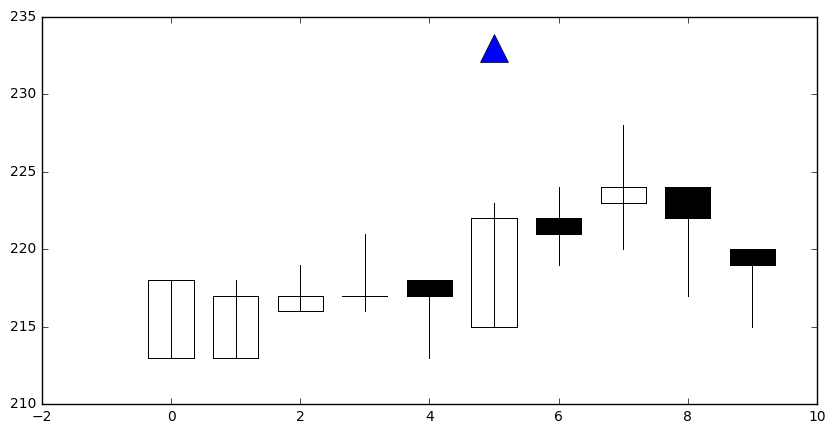

0.00448430493274


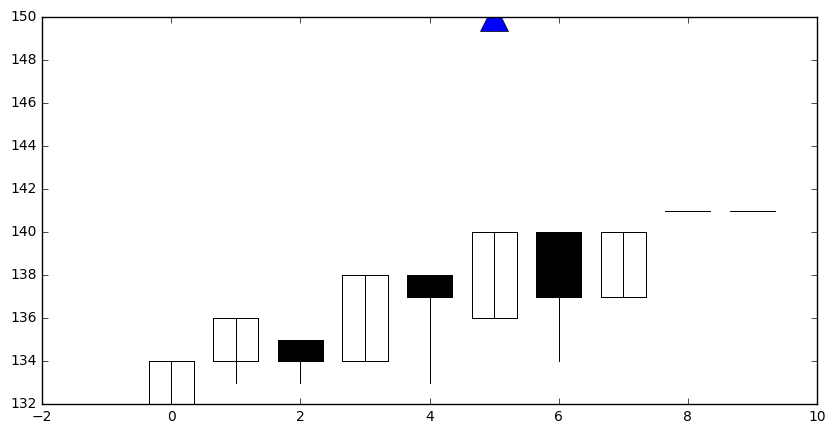

0.0


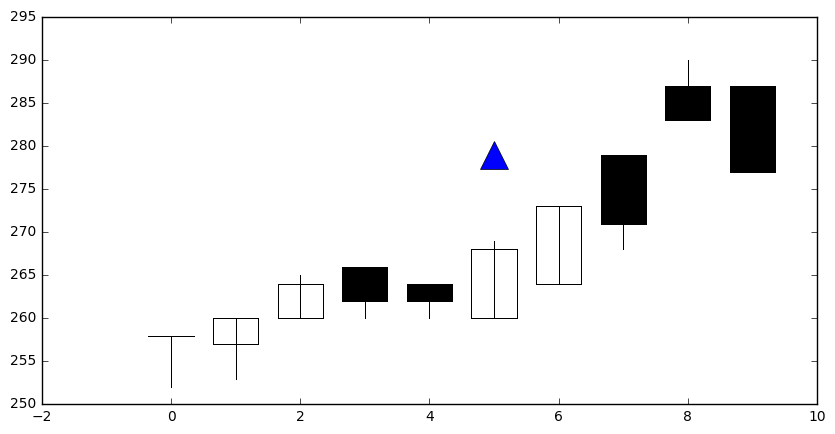

0.0148698884758


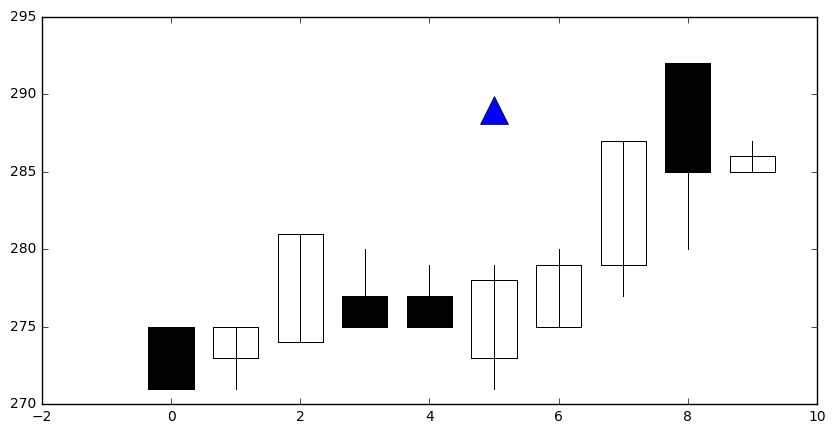

0.00358422939068


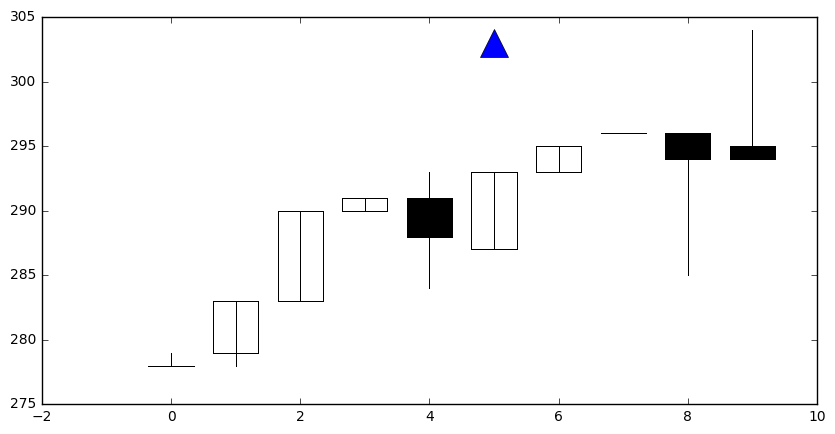

0.00682593856655


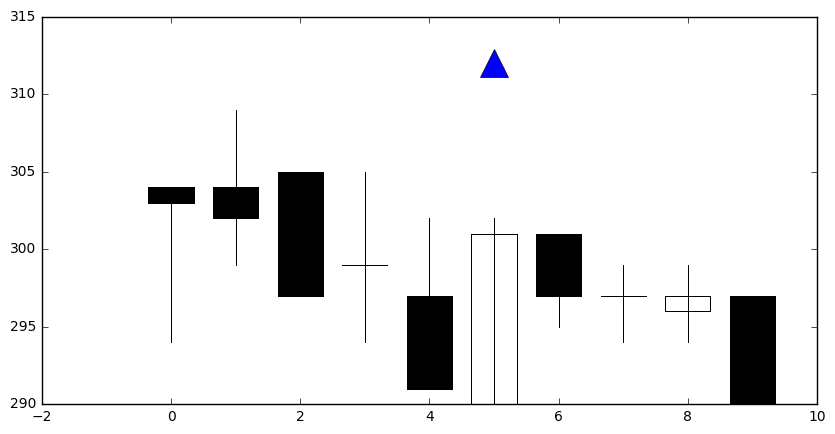

-0.00331125827815


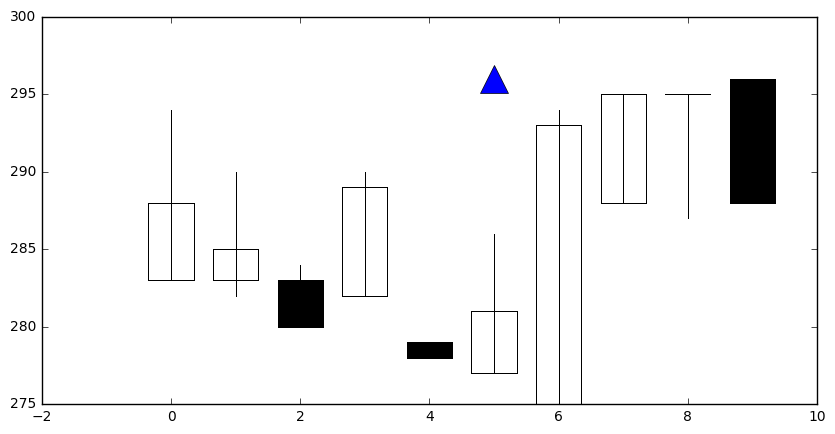

0.027972027972


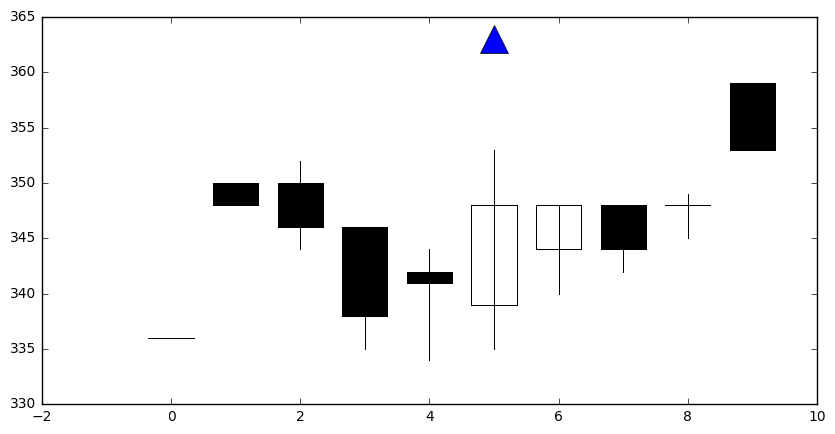

-0.014164305949


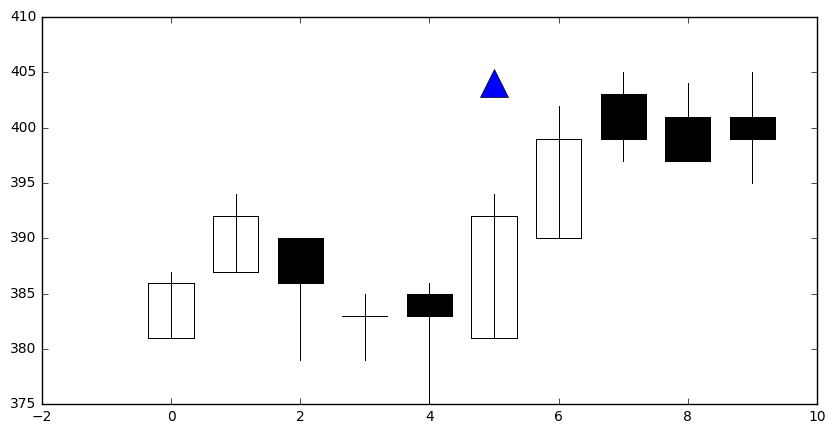

0.0203045685279


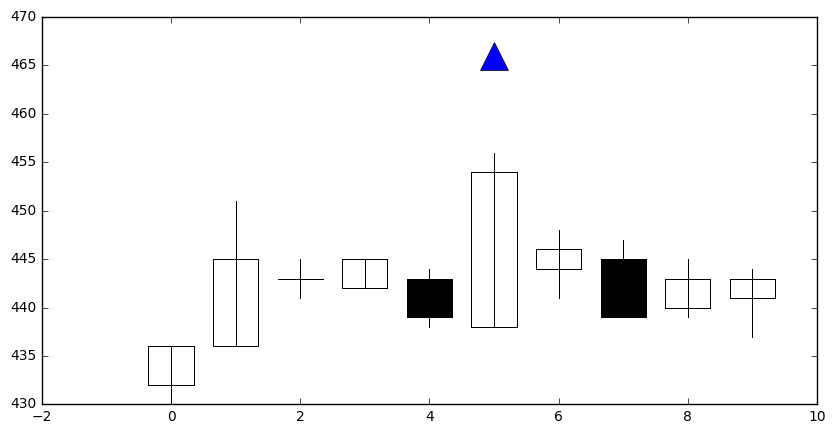

-0.0175438596491


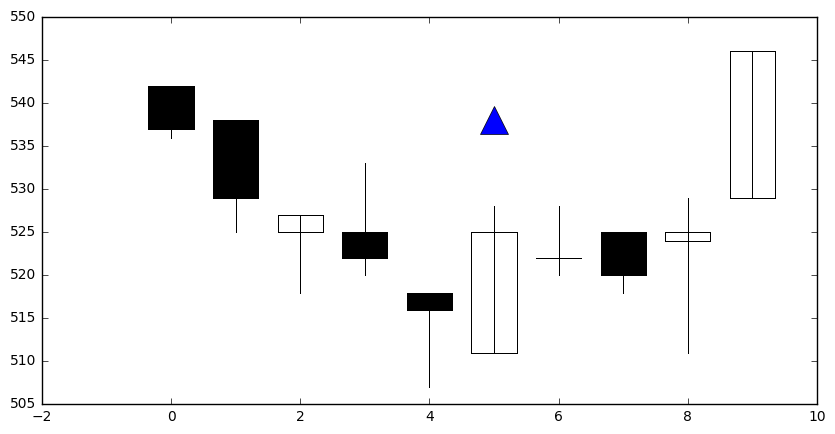

0.0


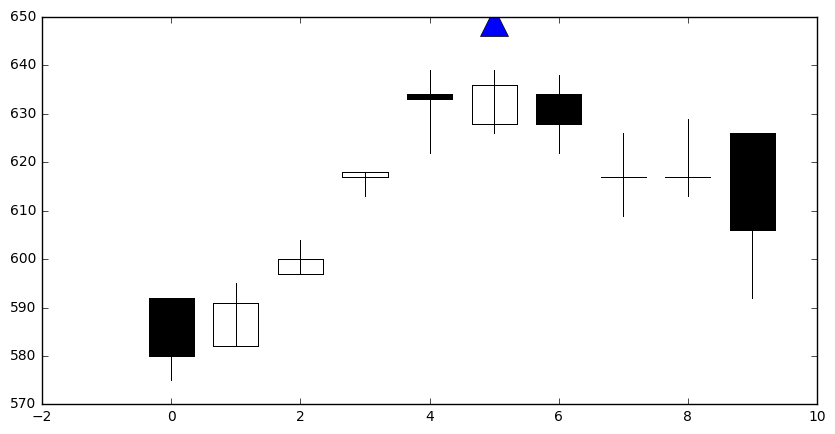

-0.00156494522692


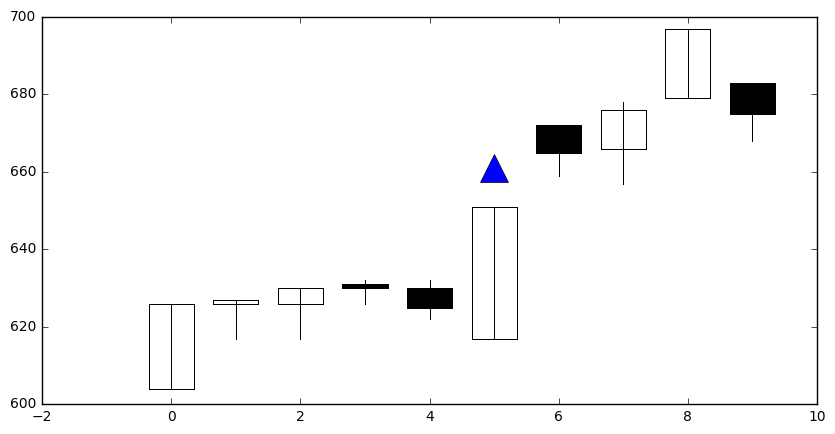

0.0322580645161


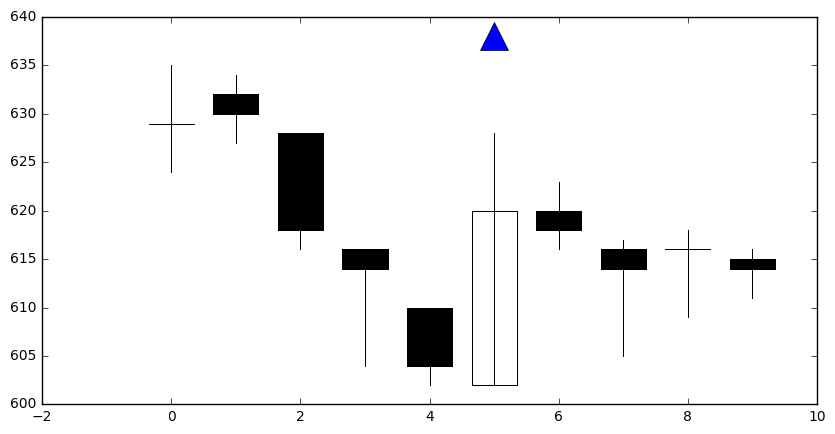

-0.00796178343949


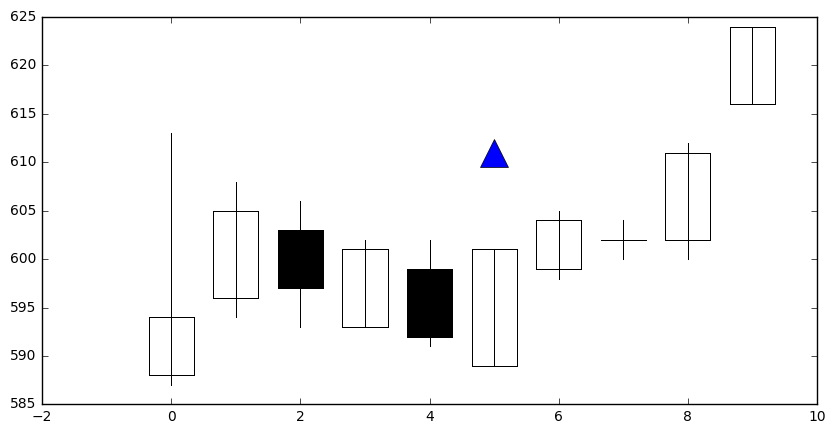

0.00665557404326


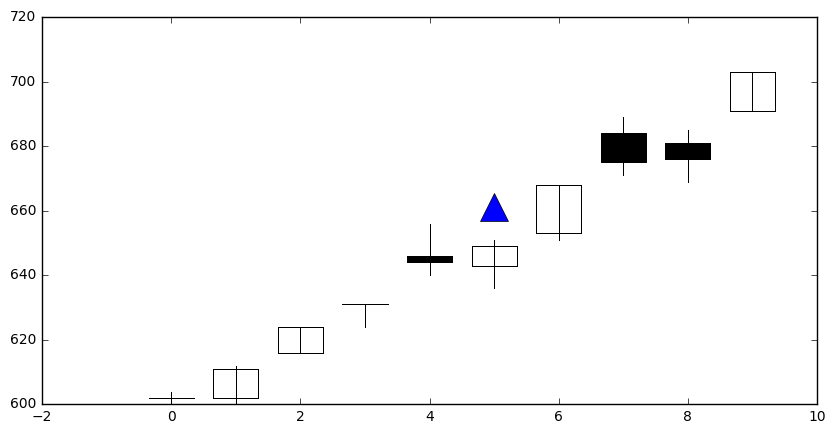

0.026113671275


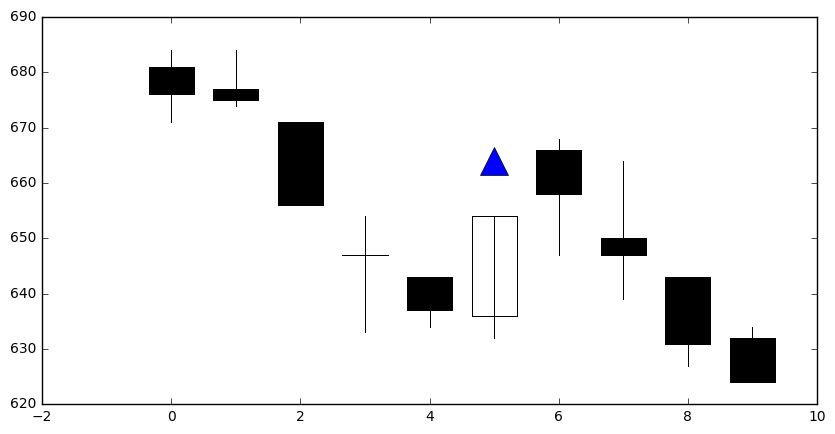

0.0214067278287


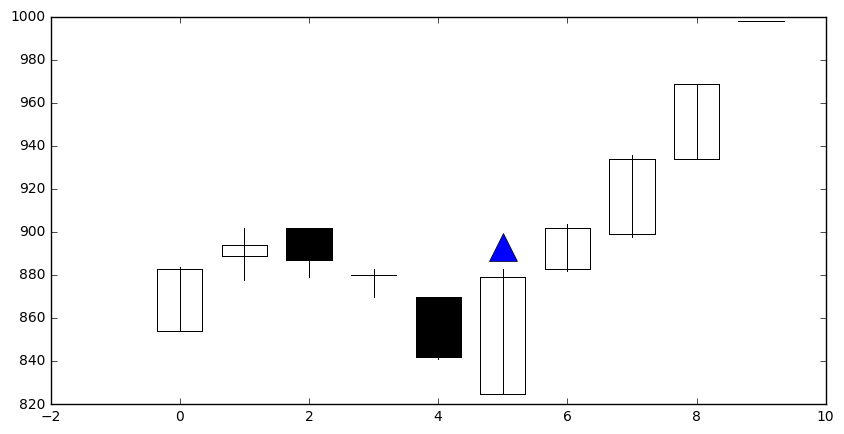

0.0237825594564


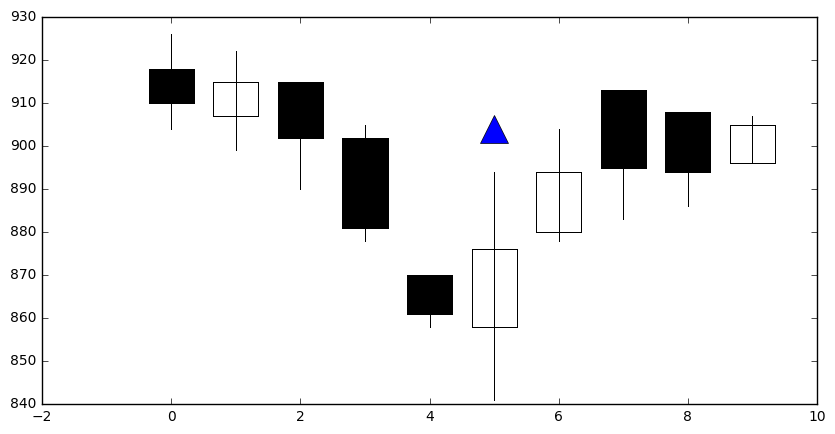

0.0111856823266


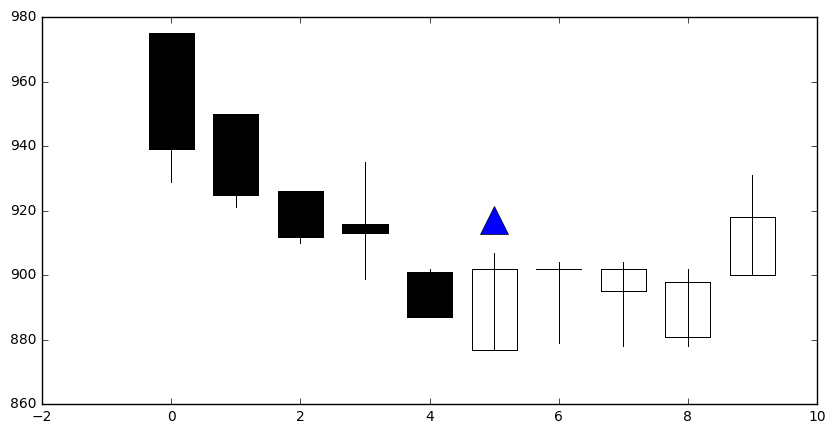

-0.00330760749724


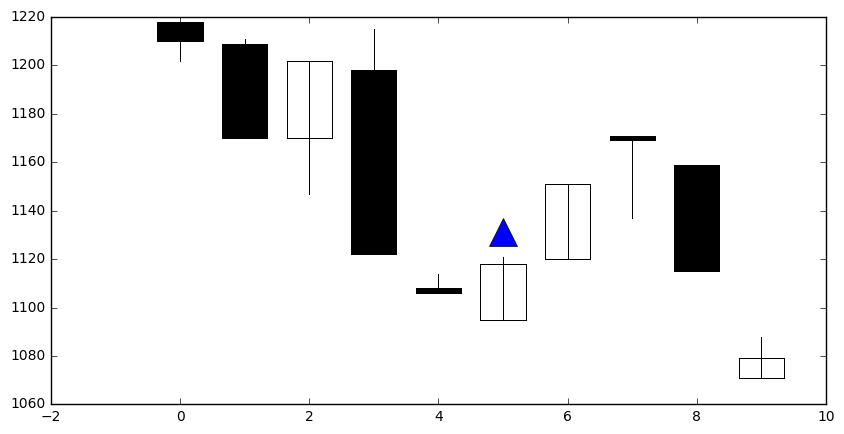

0.0267618198037


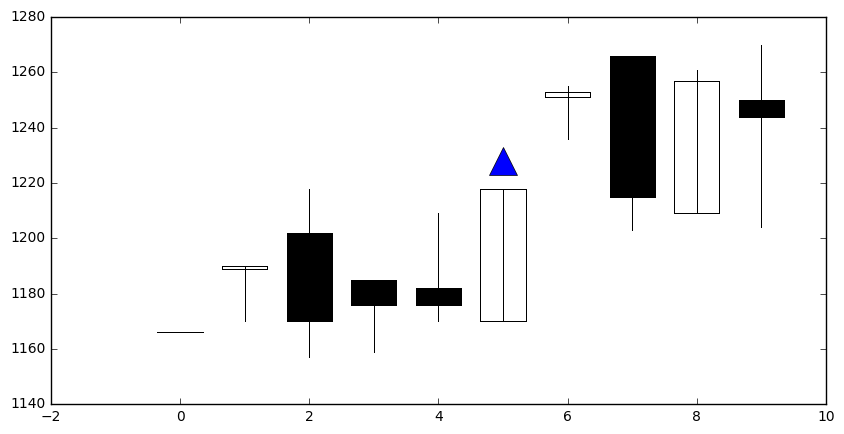

0.0303776683087


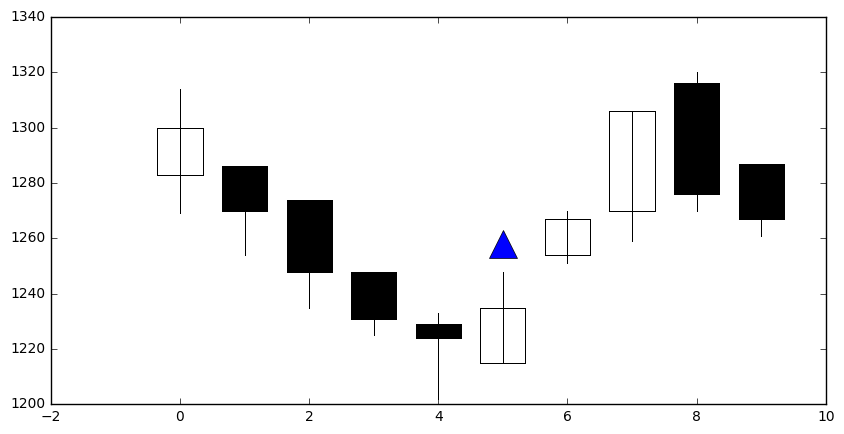

0.0176282051282


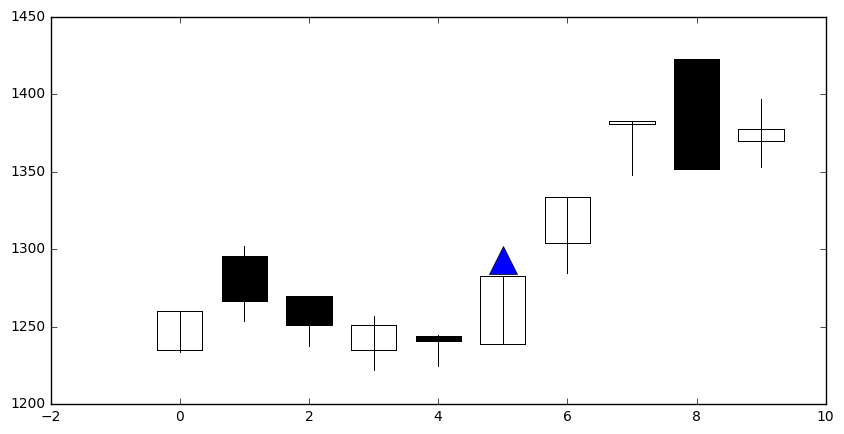

0.0397505845674


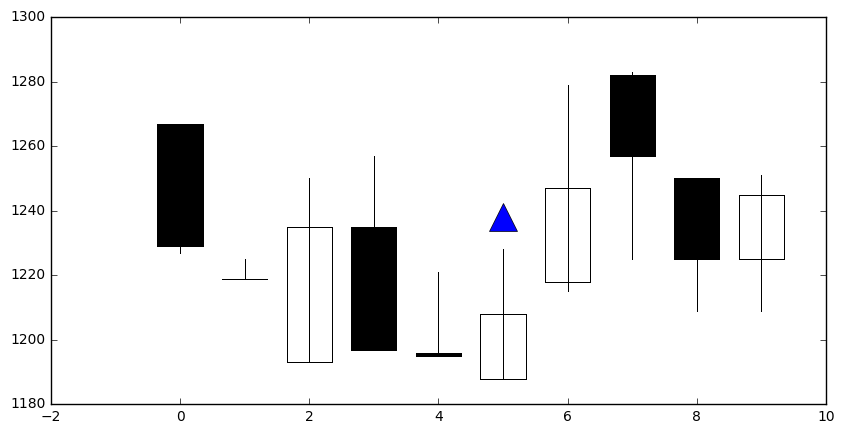

0.0415309446254


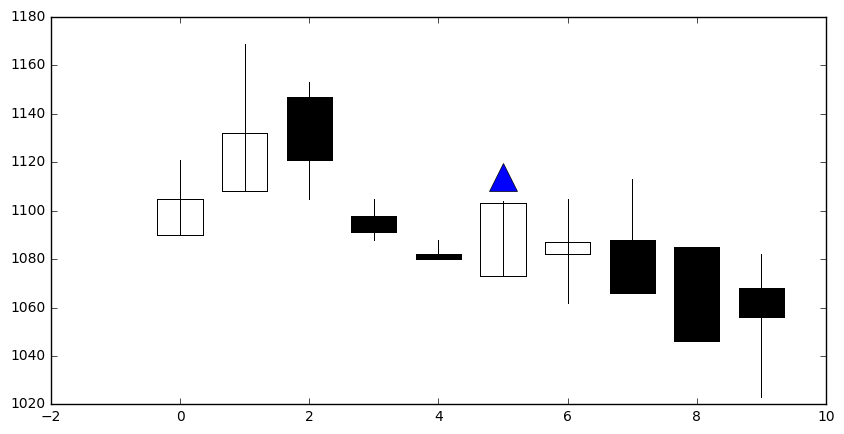

0.000905797101449


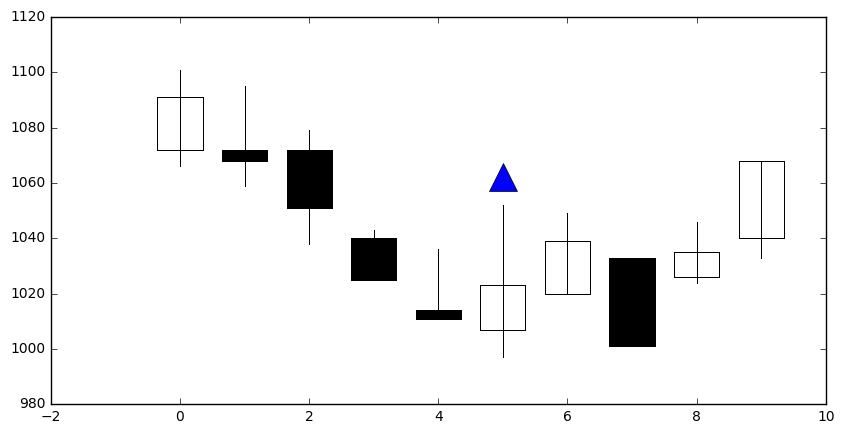

-0.00285171102662


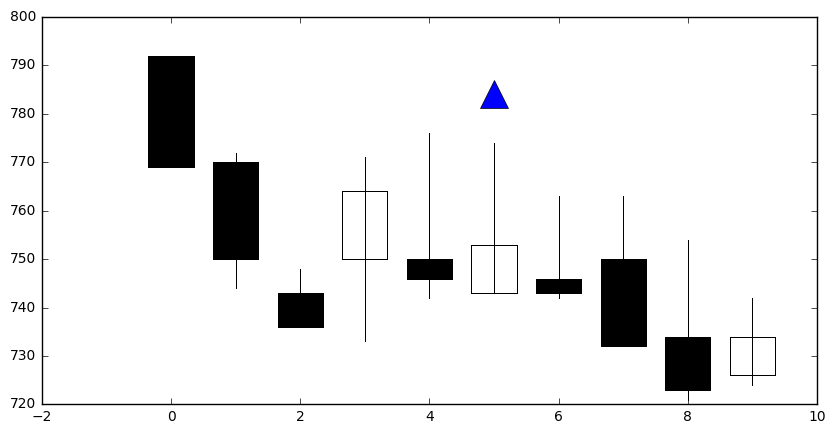

-0.0142118863049


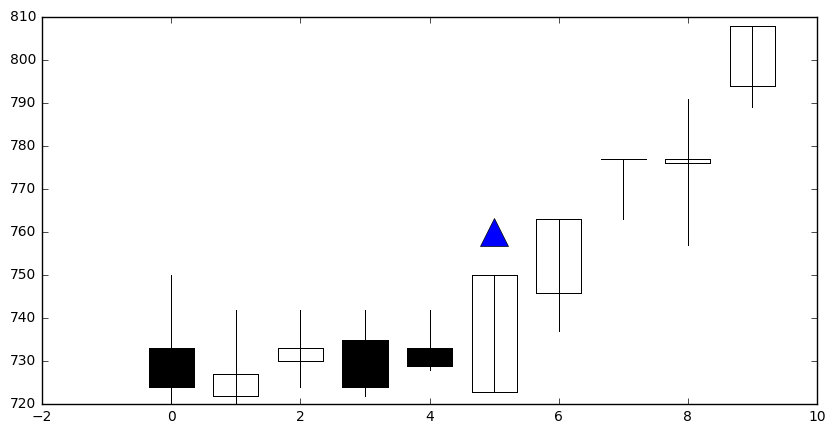

0.0173333333333


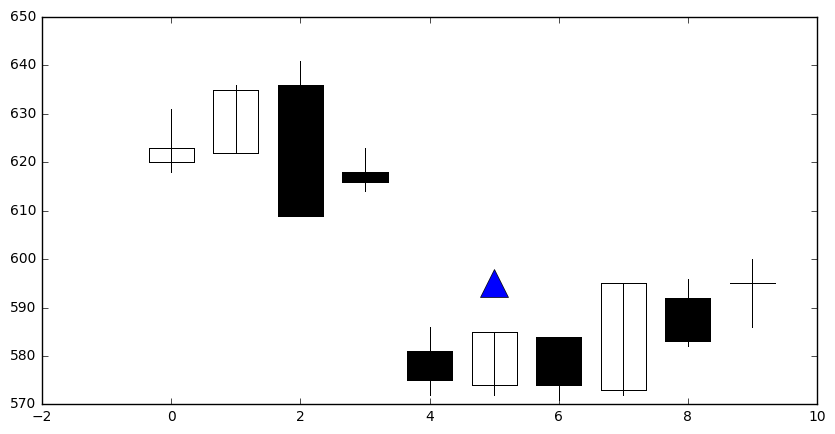

-0.0017094017094


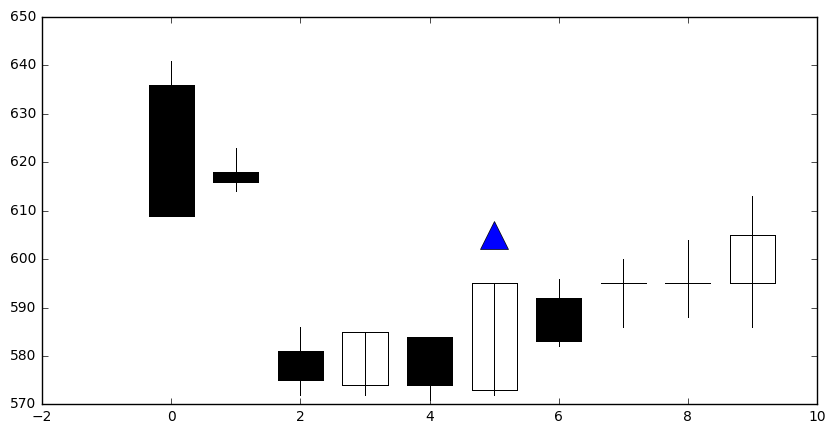

0.00168067226891


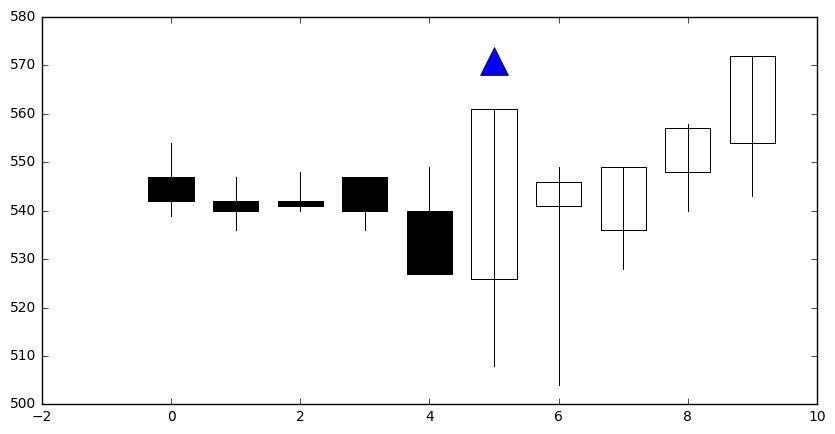

-0.0213903743316


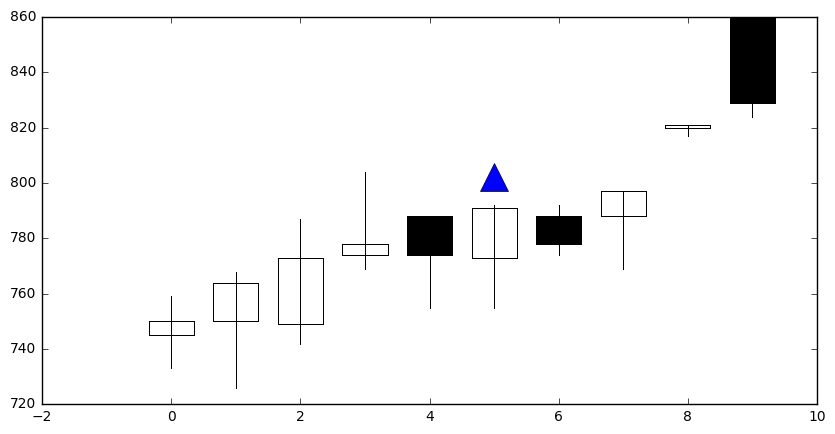

0.0


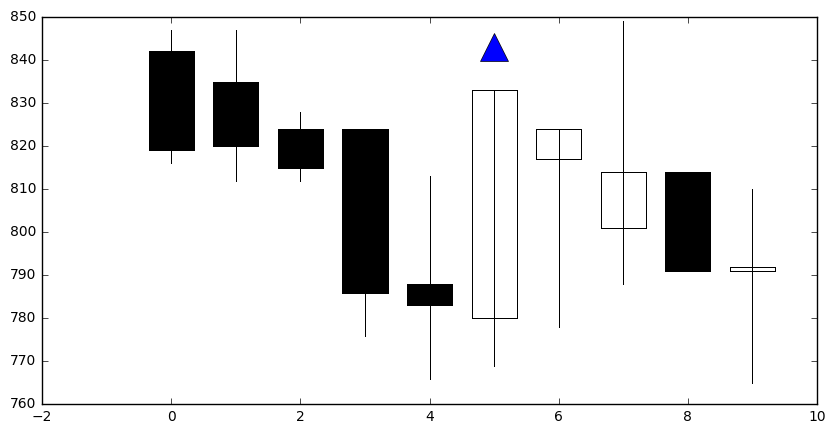

-0.0108043217287


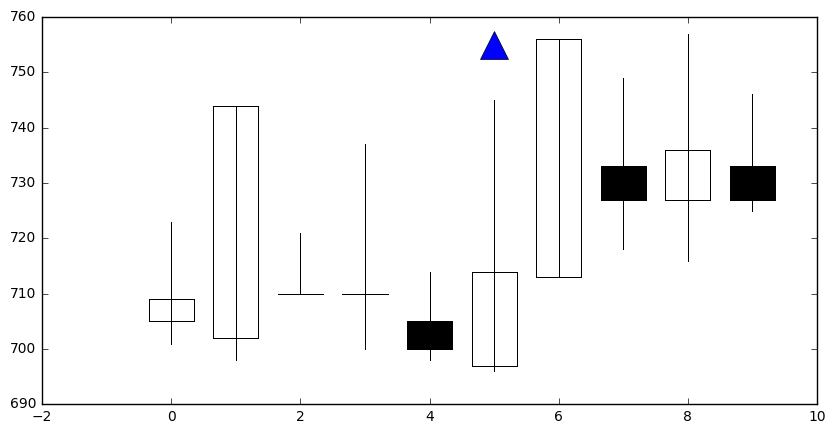

0.0147651006711


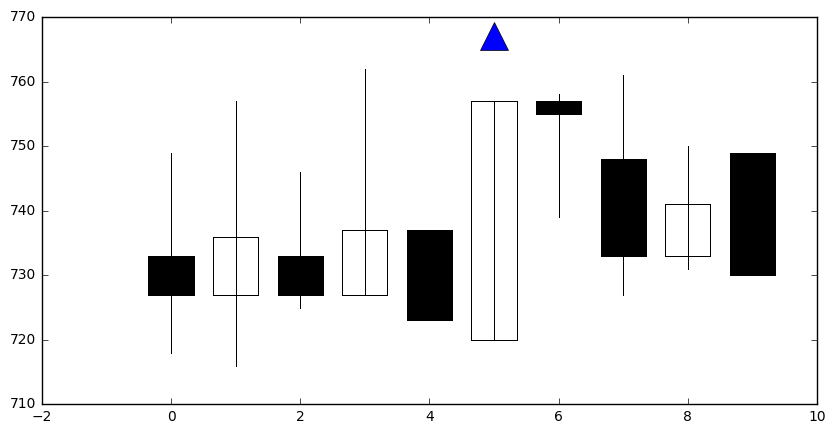

0.00132100396301


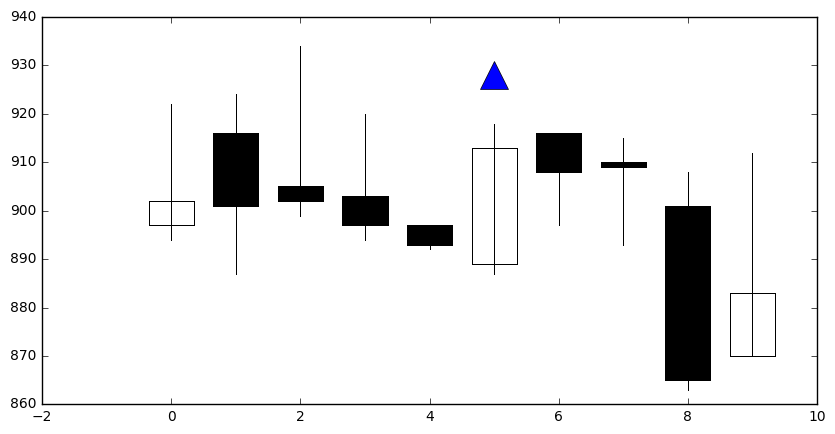

-0.00217864923747


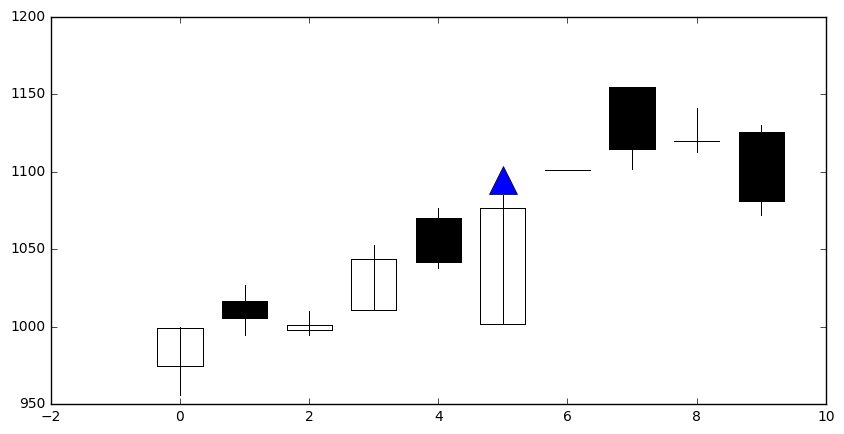

0.0147465437788


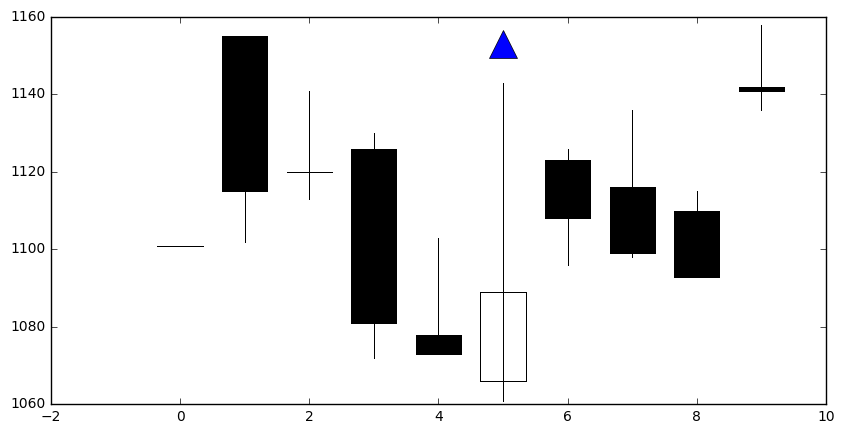

-0.0148731408574


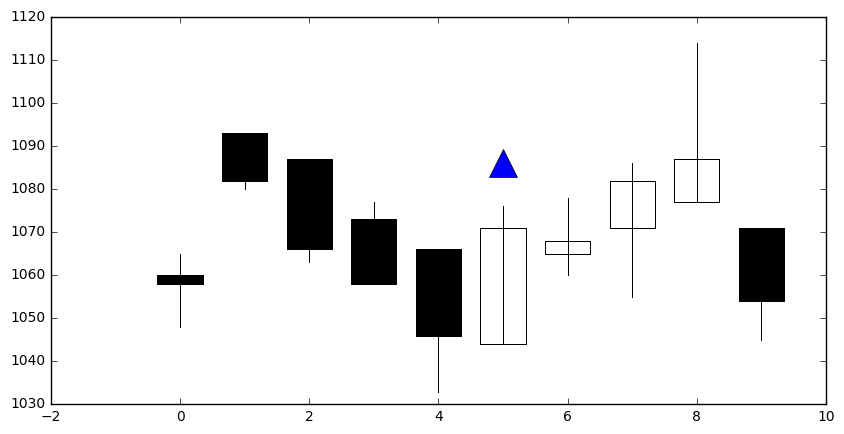

0.00185873605948


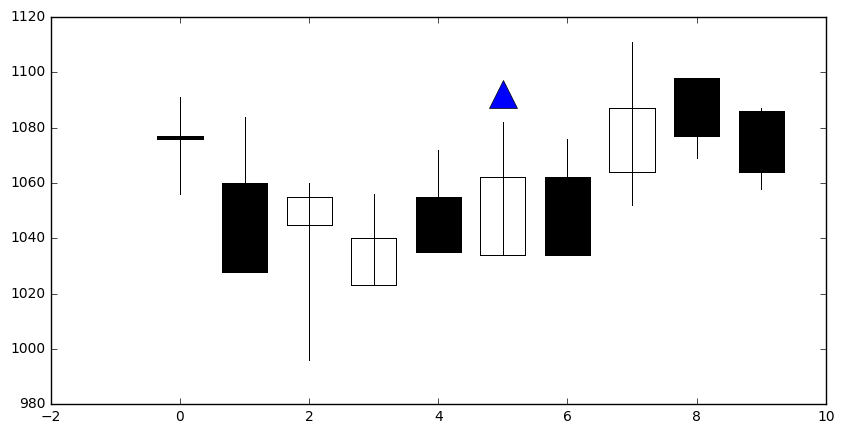

-0.00554528650647


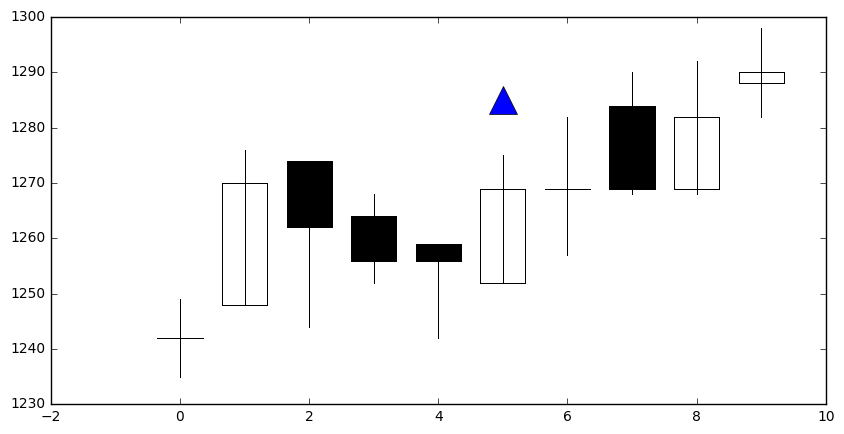

0.00549019607843


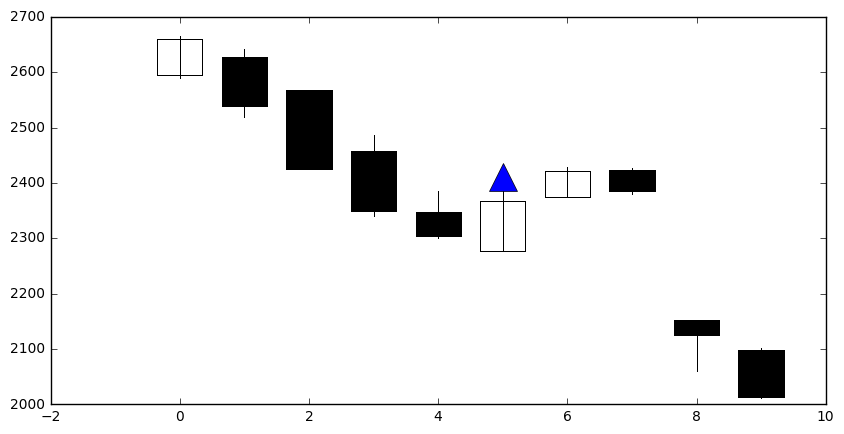

0.0120833333333


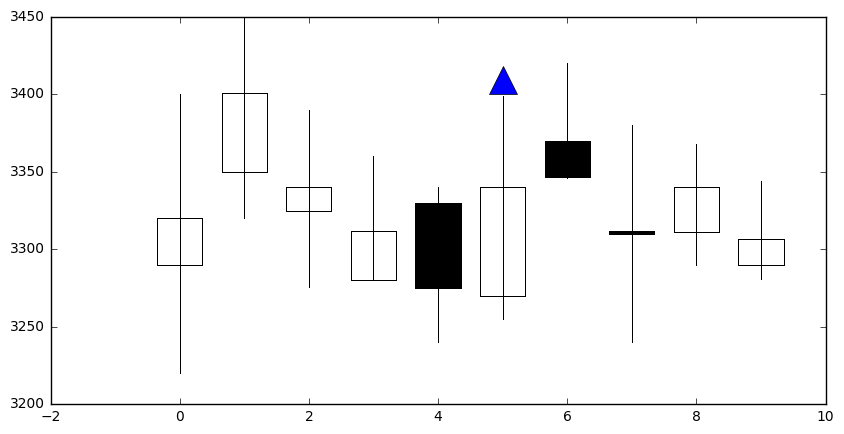

0.00617828773169
0.0154356494994


In [27]:
open = np.array([float(x) for x in df['<OPEN>'].values.tolist()])
high = np.array([float(x) for x in df['<HIGH>'].values.tolist()])
low  = np.array([float(x) for x in df['<LOW>'].values.tolist()])
close= np.array([float(x) for x in df['<CLOSE>'].values.tolist()])

res = talib.CDLCLOSINGMARUBOZU(open,high,low,close).tolist()
res = talib.CDLENGULFING(open,high,low,close).tolist()
res = np.array(res)

alls = np.where(res==100)[0]
profits = []
for pivot in alls:
    
    plot(df[pivot-5:pivot+5],'bull')
    plt.show()
    print (high[pivot+1] - high[pivot])/high[pivot]
    profits.append(((high[pivot+1] - close[pivot])/close[pivot]))

print sum(profits)/len(profits)
# print df.ix[pivot]

# print open[pivot]
# print df.ix[pivot].values
pivot_avg = sum([open[pivot],high[pivot],low[pivot],close[pivot]])/4
pivot_1_avg = sum([open[pivot+1],high[pivot+1],low[pivot+1],close[pivot+1]])/4
# pivot_2_avg = sum([open[pivot+2],high[pivot+2],low[pivot+2],close[pivot+2]])/4
# pivot_3_avg = sum([open[pivot+3],high[pivot+3],low[pivot+3],close[pivot+3]])/4

In [25]:
profits
np.std(profits)

0.023887512567623212